### ELO328 - Procesamiento Digital de Imágenes
# Taller 1

Nombre: Pedro Arce

## Reglas
1. **Fecha de entrega**:
    - El plazo límite de entrega vence el día miércoles 04/09/2024 a las 23:59.
    - Descuento por atraso: 10 puntos por cada hora.
2. Entregable:
    - La tarea debe ser entregada en un archivo .zip con el formato ```Taller1_Nombre_Apellido.zip```
    - Se debe incluir: 
        - Notebook ```Taller1_Nombre_Apellido.ipynb```.
        - Imagen(es) utilizada(s).
        
>**En caso de no cumplir con el formato, se descontará 10 puntos.**

## Desarrollo

En este taller usted deberá generar máscaras usando segmentación binaria utilizando umbralización (`thresholding`) y el algoritmo de clustering K-Means.

### Parte I - Segmentation by thresholding

#### I.a)

Escriba un código en Python que permita generar máscaras binarias sobre una imagen, las cuales se generan utilizando segmentación sobre diferentes umbrales. En cada caso, los píxeles menores al umbral definido quedan con el valor mínimo (`0`) y los mayores o iguales con el valor máximo (`255`). A continuación, se muestra un ejemplo para los valores de umbral `0.1`, `0.25`, `0.5` y `0.75`. 

<div align="center">
    <img src="umbral.png" alt="" width="100%" align="center" />
</div>

<div class="alert alert-block alert-warning">
Ejecute su código con distintos umbrales y comente los resultados, analizando los valores de umbralización escogidos.
</div>

In [1]:
#Aseguramos que tenemos las bibliotecas necesarias instaladas
!pip install opencv-python matplotlib

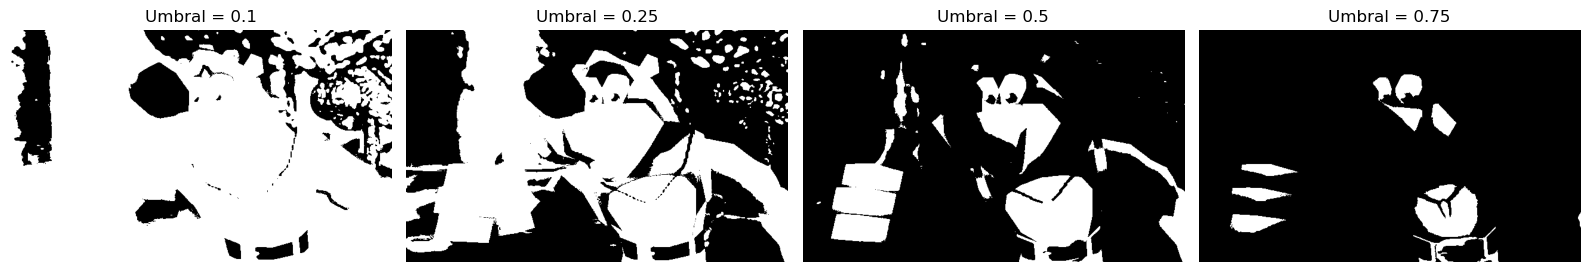

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Cargamos la imagen en escala de grises
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

#Normalizar la imagen al rango [0, 1]
image_normalized = image / 255.0

#Definir los umbrales
thresholds = [0.1, 0.25, 0.5, 0.75]

#Crear una figura para mostrar las máscaras
plt.figure(figsize=(16, 4))

#Generar y mostrar las máscaras binarias para cada umbral
for i, threshold in enumerate(thresholds):
    #Crear la máscara binaria con el umbral actual
    mask = np.where(image_normalized >= threshold, 255, 0).astype(np.uint8)
    
    #Mostrar la máscara
    plt.subplot(1, 4, i + 1)
    plt.imshow(mask, cmap='gray')
    plt.title(f'Umbral = {threshold}')
    plt.axis('off')

plt.tight_layout()
plt.savefig('1a_umbrales.png')
plt.show()

### Análisis: 

Los umbrales bajos (0.1 y 0.25) retienen más detalles de la imagen, lo que puede ser útil cuando se quiere preservar más información visual. Además, pocos píxeles se consideran oscuros, resultando en muchas áreas blancas (255).

Los umbrales intermedios (0.5) logran un balance efectivo entre segmentación y preservación de detalles, siendo útiles para muchas aplicaciones de procesamiento de imágenes. Los píxeles son divididos equitativamente; la mitad se vuelve blanca (255) y la otra negra (0), resaltando el contraste entre claros y oscuros.

Los umbrales altos (0.75) generan una segmentación más agresiva, útil cuando se desea resaltar solo las partes más brillantes o significativas de una imagen. Solo los píxeles más brillantes permanecen blancos, mientras que la mayoría de los píxeles se vuelven negros (0).

#### I.b)

Escoger un umbral de los anteriores y segmentar cambiando la resolución de la imagen con efecto pixelado usando diferentes porcentajes de pixeles. A continuación, se muestra un ejemplo para los porcenajes de pixelación de `10%`, `25%`, `50%` y `75%`.

<div align="center">
    <img src="pixeles.png" alt="" width="100%" align="center" />
</div>

<div class="alert alert-block alert-warning">
Ejecute su código con distintos porcentajes de pixeles y comente los resultados, analizando como se comporta la umbralización sobre los valores de pixelación escogidos.
</div>

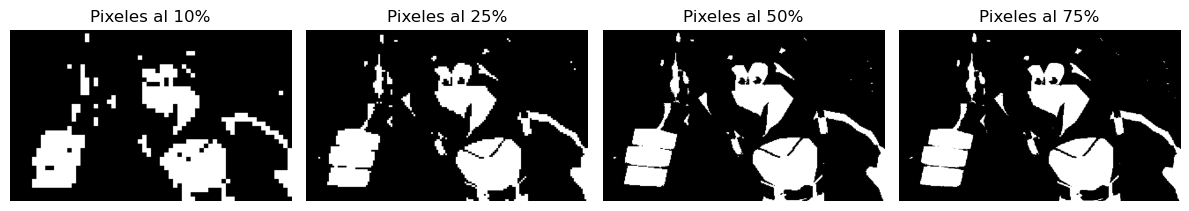

In [3]:
#Aplicamos un umbral específico, en este caso el intermedio en donde se ve un mejor balance en la imagen
threshold = 0.5
mask = np.where(image_normalized >= threshold, 255, 0).astype(np.uint8)

#Definir los porcentajes de pixelado
pixelation_levels = [0.1, 0.25, 0.5, 0.75]

#Crear una figura para mostrar los resultados
plt.figure(figsize=(12, 4))

#Generar y mostrar las imágenes pixeladas
for i, level in enumerate(pixelation_levels):
    #Redimensionar la imagen a un porcentaje del tamaño original (pixelado)
    small = cv2.resize(mask, (int(mask.shape[1] * level), int(mask.shape[0] * level)), interpolation=cv2.INTER_NEAREST)
    
    #Restaurar la imagen al tamaño original (con el efecto pixelado)
    pixelated = cv2.resize(small, (mask.shape[1], mask.shape[0]), interpolation=cv2.INTER_NEAREST)
    
    #Mostrar la imagen pixelada
    plt.subplot(1, 4, i + 1)
    plt.imshow(pixelated, cmap='gray')
    plt.title(f'Pixeles al {int(level * 100)}%')
    plt.axis('off')

plt.tight_layout()
plt.savefig('1b_pixeles.png')
plt.show()

### Análisis: 

A medida que disminuye la cantidad de píxeles, la imagen se vuelve más pixelada, mostrando bloques grandes y perdiendo detalles finos, lo que simplifica la imagen a formas y contrastes básicos. 

Por otro lado, al aumentar el porcentaje de píxeles, la pixelación disminuye, permitiendo que se destaquen mejor los contornos y zonas segmentadas según el umbral aplicado, logrando una representación más precisa y detallada de la imagen original.

La combinación de umbralización y pixelación permite ajustar tanto el nivel de segmentación como la claridad visual, destacando distintas características de la imagen y ofreciendo un control efectivo sobre la simplificación y el énfasis de detalles específicos en cada nivel de pixelado.

### Parte II - K-Means

#### II.a)

Escriba un código en Python que permita generar `K` máscaras binarias sobre una imagen, las cuales se generan aplicando K-Means, formando `K` grupos y asignando a todos los píxeles del clúster `k`-ésimo el valor máximo (`255`) y a todos los píxeles que no sean de ese clúster el valor mínimo (`0`). A continuación, se muestra un ejemplo para `K=5`.

<div align="center">
    <img src="clustering.png" alt="" width="100%" align="center" />
</div>

<div class="alert alert-block alert-warning">
Ejecute su código con distinto número de clústeres y comente los resultados, analizando los valores de agrupación escogidos.
</div>

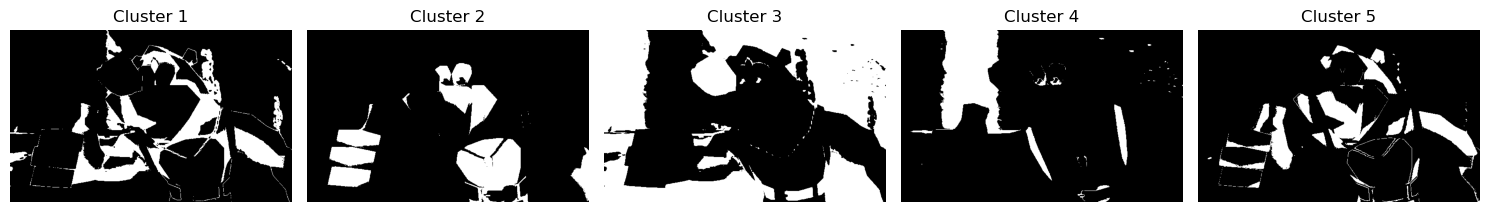

In [18]:
from sklearn.cluster import KMeans
from skimage.color import rgb2gray
from skimage.io import imread

image = imread('test.jpg')

pixels = image.reshape(-1, 3)  #Convertir la imagen a una lista de píxeles RGB

k = 5  #Cambia K según la cantidad de clusters deseados
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0).fit(pixels)
labels = kmeans.labels_.reshape(image.shape[0], image.shape[1])

fig, axes = plt.subplots(1, k, figsize=(15, 5))
for cluster in range(k):
    mask = np.where(labels == cluster, 255, 0).astype(np.uint8)  #Generar máscara binaria
    axes[cluster].imshow(mask, cmap='gray')
    axes[cluster].set_title(f'Cluster {cluster + 1}')
    axes[cluster].axis('off')

plt.tight_layout()
plt.savefig('2a_mascaras_binarias.png')
plt.show()

### Análisis: 

*Cluster 1 y 5:* Estos clústeres parecen capturar áreas con intensidades y texturas específicas, probablemente agrupando zonas oscuras y partes con bordes.

*Cluster 2 y 3:* Estas máscaras muestran un enfoque en áreas más brillantes o con diferentes tonalidades, lo que resalta la variación en las texturas y formas de la imagen.

*Cluster 4:* Este clúster destaca una región que podría estar menos representada en otros clústeres, mostrando una distribución específica de tonos medios o áreas con poca variación.

Cambiar el número de clústeres puede alterar cómo se distribuyen los píxeles en la imagen, lo que afecta la claridad y precisión de la segmentación. Valores más bajos de *k* agruparán más áreas juntas, mientras que valores más altos podrían segmentar demasiado, creando "ruido" en la segmentación.

#### II.b)

Modifique el código anterior para asignar a todos los píxeles del clúster `k`-ésimo el valor del centroide, y de esa forma colorear el grupo con el color promedio. A continuación, se muestra un ejemplo para `K=5` con la imagen anterior.

<div align="center">
    <img src="colores.png" alt="" width="100%" align="center" />
</div>

<div class="alert alert-block alert-warning">
Ejecute su código con los mismos valores anteriores y comente los resultados, comparando la parte IIa y IIb.
</div>

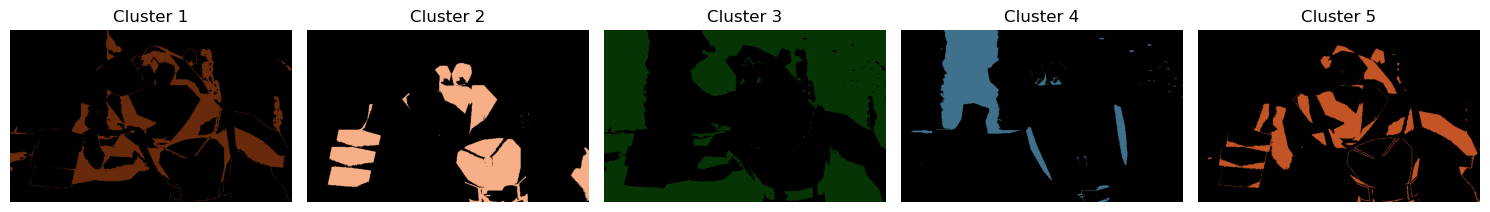

In [20]:
k = 5  #N° de clústeres
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0).fit(pixels)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_.astype(np.uint8)

#Crear imagen segmentada con colores de los centroides
segmented_image = centroids[labels].reshape(image.shape)

#Mostrar la imagen segmentada con los colores promedios
fig, axes = plt.subplots(1, k, figsize=(15, 5))
for cluster in range(k):
    mask = np.where(labels.reshape(image.shape[:2]) == cluster, 1, 0).astype(bool)
    color_segment = np.zeros_like(image)
    color_segment[mask] = centroids[cluster]
    axes[cluster].imshow(color_segment)
    axes[cluster].set_title(f'Cluster {cluster + 1}')
    axes[cluster].axis('off')

plt.tight_layout()
plt.savefig('2b_colores.png')
plt.show()

### Análisis: 

*II.a (Máscaras Binarias):* Muestra la segmentación en blanco y negro, destacando las formas y bordes de los clústeres sin detalles de color. Es útil para identificar la estructura básica y la distribución espacial de los grupos.

*II.b (Colores Promedios):* Colorea cada clúster con su valor promedio, mostrando las variaciones de color y textura dentro de cada grupo. Esto proporciona una representación más detallada y realista de la segmentación.

**Conclusión:** La Parte II.a es ideal para detectar formas y bordes de manera simple, mientras que la Parte II.b ofrece una visualización más rica y detallada, adecuada para análisis donde los colores y texturas son importantes.